In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from estimator import IriModel

### This is how the model performs on syntetic data

In [19]:
v = 32
data = np.load("../quartercar/experiments/data/predict_iri_data_vel"+str(v)+".npy")

iri = data[:, -1]
acc_var = data[:, 1][:, np.newaxis]
acc_max = data[:, 3][:, np.newaxis]

scaler = StandardScaler(with_mean = False)

data = np.concatenate((acc_var, acc_max), axis = 1)
scaler.fit(data)
X = scaler.transform(data)

X_train, X_test, y_train, y_test = train_test_split(X, iri, test_size=0.3, random_state=42)

In [31]:
model = IriModel()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("MSE on (syntetic) devset:", mean_squared_error(preds, y_test))

MSE on (syntetic) devset: 0.49830586650508546


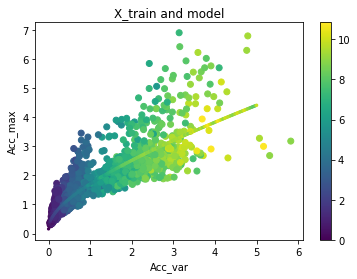

In [22]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(model.neighbors[:, 0], model.neighbors[:, 1], c = model.neighbor_iris, s = 5)
plt.colorbar()
plt.title("X_train and model")
plt.ylabel("Acc_max")
plt.xlabel("Acc_var")
plt.show()


### Let's look at how the real test data compares to the train set

In [23]:
real_test = pickle.load(open("all_segments.pickle", "rb"))
real_test = real_test.loc[real_test['Velocity'] >= v-0.5]
real_test = real_test.loc[real_test['Velocity'] < v+0.5]
around_v = np.concatenate((np.array(real_test['acc_var'])[:, np.newaxis], 
                np.array(real_test['acc_max'])[:, np.newaxis]), axis = 1)
around_v = scaler.transform(around_v)

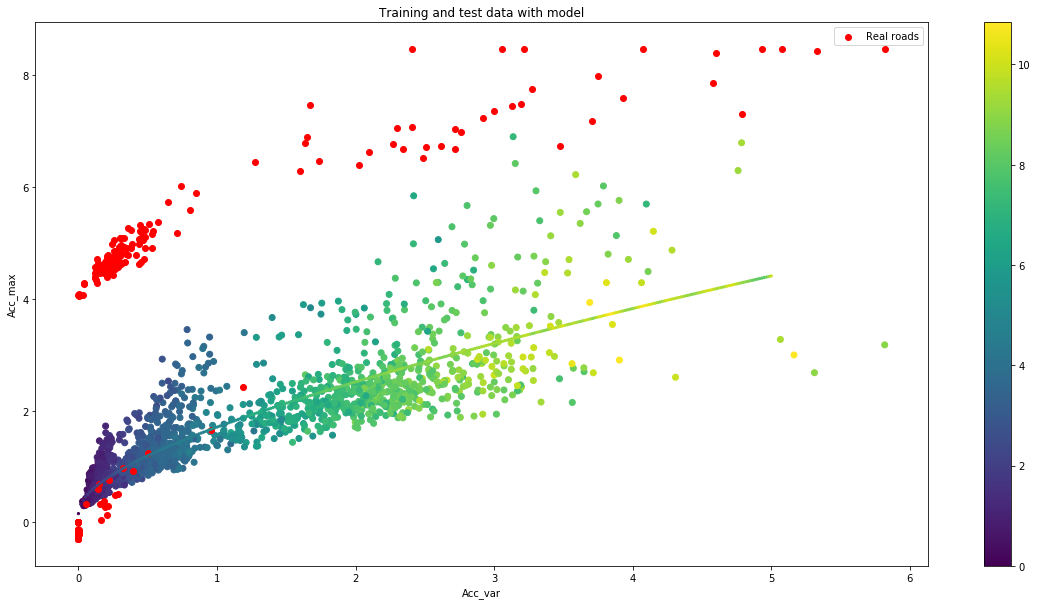

In [26]:
plt.figure(figsize=(20, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(around_v[:, 0], around_v[:, 1], c = 'red', label = "Real roads")
plt.scatter(model.neighbors[:, 0], model.neighbors[:, 1], c = model.neighbor_iris, s = 5)
plt.colorbar()
plt.title("Training and test data with model")
plt.legend()
plt.ylabel("Acc_max")
plt.xlabel("Acc_var")
plt.show()

### Removing the mean improves the fit -is it a good idea though?

In [27]:
real_test = pickle.load(open("all_segments_no_mean.pickle", "rb"))
real_test = real_test.loc[real_test['Velocity'] >= v-0.5]
real_test = real_test.loc[real_test['Velocity'] < v+0.5]
around_v = np.concatenate((np.array(real_test['acc_var'])[:, np.newaxis], 
                np.array(real_test['acc_max'])[:, np.newaxis]), axis = 1)
around_v = scaler.transform(around_v)

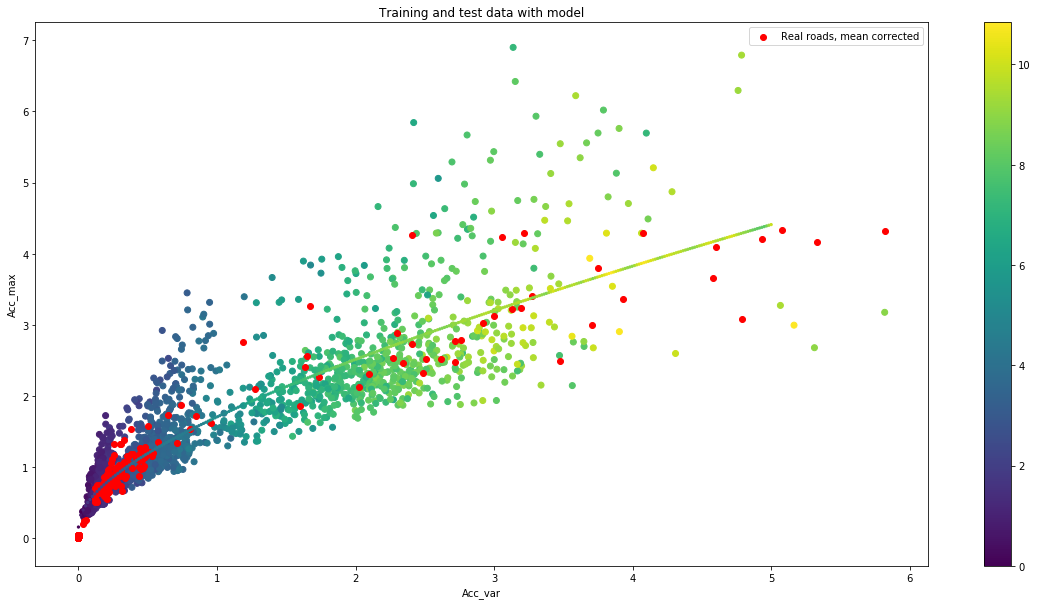

In [29]:
plt.figure(figsize=(20, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(around_v[:, 0], around_v[:, 1], c = 'red', label = "Real roads, mean corrected")
plt.scatter(model.neighbors[:, 0], model.neighbors[:, 1], c = model.neighbor_iris, s = 5)
plt.colorbar()
plt.title("Training and test data with model")
plt.ylabel("Acc_max")
plt.xlabel("Acc_var")
plt.legend()
plt.show()

In [41]:
preds_real = model.predict(around_v)

In [42]:
preds_real

array([ 2.4237904 ,  0.        ,  3.03166864,  0.        ,  8.78684473,
        8.55779795,  6.35029703,  7.81567695,  6.81431806,  5.30377526,
        3.83728514,  4.99278304,  4.21929814,  4.57923475,  3.91754444,
        3.61239731,  3.03166864,  4.21929814,  3.91754444,  2.45750897,
        2.45750897,  2.4237904 ,  2.52626417,  2.3427407 ,  2.71368554,
        2.45750897,  2.45750897,  2.19733176,  2.28067419,  2.52626417,
        2.52626417,  2.45750897,  2.71368554,  0.        ,  0.65434228,
        0.        ,  4.25158832,  4.4532277 ,  0.        ,  0.        ,
        0.        ,  0.        ,  2.71368554,  2.94942357,  2.19733176,
        4.12559134,  0.        ,  2.28953542,  3.27839498,  0.        ,
        3.96790974,  0.        ,  2.28953542,  3.03166864,  2.28953542,
        0.        ,  0.        ,  2.19733176,  2.19733176,  2.03728304,
        4.46057896,  2.94942357, 10.17657122,  7.70361594,  8.78684473,
        8.63619213,  9.36406499,  8.66642385,  9.08160707,  8.20

### Now, let's make predictions

In [40]:
for i in range(1, 40):

    data = np.load("../quartercar/experiments/data/predict_iri_data_vel"+str(v)+".npy")

    iri = data[:, -1]
    acc_var = data[:, 1][:, np.newaxis]
    acc_max = data[:, 3][:, np.newaxis]

    scaler = StandardScaler(with_mean = False)

    data = np.concatenate((acc_var, acc_max), axis = 1)
    scaler.fit(data)
    X = scaler.transform(data)

    model = IriModel()
    model.fit(X_train, y_train)

    real_test = pickle.load(open("all_segments_no_mean.pickle", "rb"))
    real_test = real_test.loc[real_test['Velocity'] >= v-0.5]
    real_test = real_test.loc[real_test['Velocity'] < v+0.5]
    around_v = np.concatenate((np.array(real_test['acc_var'])[:, np.newaxis], 
                    np.array(real_test['acc_max'])[:, np.newaxis]), axis = 1)
    around_v = scaler.transform(around_v)

    preds_real = model.predict(around_v)

    real_test['Preds'] = preds_real

    pickle_out = open("Preds/preds_vel"+str(vel)+".pickle","wb")
    pickle.dump(real_test, pickle_out)
    pickle_out.close()   